# <!-- TITLE --> - TITLE : BUILD YOUR LINEAR REGRESSION MODEL IN PYTHON -
<img width="1500px" heigh="1000px" src="out.png"></img>

#### <!-- AUTHOR --> - Author : __Dr. Amiehe-Essomba__ (c) 2023

## Objectives :
 - We are going to create a __Linear Regression (LR) model__ to make prediction, for that we'll use \
 the __Mean Squared Error(MSE)__ to compute the cost and loss functions 
 
## Equations : 
  The equation of linear model can be difined as 
  
 ```python
    Yhat = A * X + b
```

  __Where :__

  * __Yhat__ : is the predicted value
  * __A__ : is the slope
  * __b__ : is the bias 
  * __X__ : a matrix of dimension (n, m) that contains the features

The __MSE__ equation is :

```python
MSE = (1 / m) * ( (Y - Yhat) ** 2 ).sum( axis = 0)
```

  Where : 

  * __m__ is the number of points(samples size)
  * __Yhat__ is the predicted value
  * __Y__ is the True value( target value )

The COST function 

```python
cost = (1 / 2 * m) * ( (Y - Yhat) ** 2 ).sum( axis = 0)
```

## Derivatives 

```ruby
dA = (dcost / dA) 
   = (1 / m) * X.T * (Y - Yhat).sum()

db = (dcos / db)
   = (1 / m) * (Y - Yhat).sum()
```

## Back propagation equations : 
```ruby
A = A - learning_rate + dA
b = b - learning_rate + db
```

## Metrics : 
```python
R = 1 - [ ((Y - Yhat) ** 2).sum(axis=1) / ((Y - Y.mean(axis=0)) ** 2).sum(axis=0) ]
```
more R is closed to 1 better is the model 

## Turning hyperparameters :
 * __learning_rate__
 * __max_iter__ for iterations to reach to the convergence of until the 
 * __epsilon__ for convergence

The gradient becomes smaller and we break the loop when (dgrad < epsilon).\
In this case we'll use while loop to be sure that we reach to the convergence (local minimum is found)

 * shape = X.shape = (n, m)

## Initialization :
```python
params = {'b' : np.zeros((1, 1)), 'A' : np.zeros((n_feature, 1)) }
```

Then after initaliazing parameters we can compute the rest of functions

```python
index, costs = 0, []
while dgrad > epsilon:
    dA, db  = grads['dA'], grads['db']
    cost    =  (1 / 2 * m) * ( (Y - Yhat) ** 2 ).sum( axis = 0)
    costs.append(cost)
    # back propagation 
    params['A'] = params['A'] - learning_rate * dA
    params['b'] = params['b'] - learning_rate * db

    if index == 0: pass 
    else:
        dgrad = costs[index] - costs[index-1]

    index += 1
```

## What we will do here :

 - Creating a new dataset using __make_regression__ from __sklean.dasets__ 
 - Data preprocessing( **cleaning and normalization**)
 - Building our linear model 
 - Training our model
 - Testing our model
 - Computing metrics such as R for evaluating the model performance
 

In [167]:
% matplotlib inline
import numpy as np
from sklearn.datasets import make_classification , make_regression
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler as mm

UsageError: Line magic function `%` not found.


In [168]:
def Model(X : np.ndarray, params : dict = {}):
    """ 
    Y = A.X + b
    Note that :
    A.dim() = [n, 1]
    X.dim() = [m, m]
    b.dim() = [1, ]

    """
    model = X.dot(params['A']) + params['b']
   
    return model


In [169]:
def Params(n: int = 1):
    """ 
    params = (A, b)
    A = slope 
    b = bias
    """
    # random normal for both values 
    A = np.random.randn(n, 1)
    b = np.random.randn(1,1).reshape((-1,))

    return {"A" : A, "b" : b} 



In [170]:
def COST(X : np.ndarray, y : np.ndarray, params : dict = {}):
    """
    COST using here is the MSE (Mean-Squared-Error)
    """ 
    cost = ( (Model(X=X, params=params) - y) ** 2 ).mean(axis=0) / 2.0

    return  cost

In [171]:
def Metrics(X : np.ndarray, y : np.ndarray, params : dict = {}):
    """
    Determination coefficient R
    """
    upper   = ( (Model(X=X, params=params ) - y) ** 2 ).sum(axis=0)
    lower   = ( (y - np.mean(y)) ** 2 ).sum(axis=0)

    R       = 1 - (upper / lower)
    model_eval   = "GOOD" if R > 0.7 else 'WORSE'

    return R[0]


In [172]:
def back_propagation(X : np.ndarray, y : np.ndarray, params : dict = {}):
    grads = {'dA' : None, 'db' : None}
    """
    note that X.dum() = [m, n_features] with n_features = 1 (linear case) number of feature, m is the samples size 
    X.T.dim() = [1, m] and the result of Model() if [m, n_features] that why the summation is on axis = 1 because 
    the final matrix in [m, 1]

    We can see that in the case of db the summation is on axis=0 because the form of matrix does not change [m, n_features]
    """
    grads['dA'] = ( X.T.dot( Model(X=X, params=params) - y )).mean(axis=1).reshape((X.shape[1], 1))
    grads['db'] = ( Model(X=X, params=params) -y ).mean(axis=0)

    return grads

In [173]:
def SGD(X : np.ndarray, y : np.ndarray, params : dict = {}, 
        learning_rate : float = 1e-4, epsilon = 1e-3, print_val : bool=False ):

    cost_history, eval, iter = [], [], 0
 
    while True:
        grads = back_propagation(X = X, y =y, params = params)
        params['A'] = params['A'] - learning_rate * grads['dA']
        params['b'] = params['b'] - learning_rate * grads['db']
        cost        =  COST(X=X, y=y, params=params)
        cost_history.append( cost)

        eval.append( Metrics(X=X, y=y, params=params) )

        if iter < 5 : pass 
        else:
            if np.abs( cost_history[iter] - cost_history[iter-1] ) <= epsilon : 
                print(f"cost function :\n{cost}\nR :\n{eval[-1]}\nnew params :\n{params}\ninteration :\n{iter} ")
                break
            else: pass

        if print_val is True:
            if iter % 10 == 0:
                if cost not in [np.nan]:
                        print(f"cost function : {cost} : interation : {iter} ")
                else: break
            else: pass 
        else: pass 
        
        iter += 1

    cost_history = np.array(cost_history)
    eval = np.array(eval)

    return params , cost_history.reshape((-1, 1))[:iter, : ], eval.reshape((-1, 1))[:iter, : ], iter

In [174]:
n_features = 1
# generating samples
X, y    = make_regression(n_samples=500, n_features=n_features, noise=10, random_state=10)
# reshape dimensions
X       = X.reshape((-1, n_features))
y       = y.reshape((-1, 1))

# initialization 
params  = Params(n_features)

# prediction before training the model
yhat_   = Model(X=X, params=params) 

# training and evaluating  the model
params , cost_history, eval, iter= SGD(X=X, y=y, params=params, learning_rate=1e-4, print_val=False, epsilon=1e-4)

# metrics compute
cost_history, eval = cost_history.reshape((-1,)), eval.reshape((-1,))

# prediction 

yhat = Model(X=X, params=params).reshape((-1, ))



cost function :
[47.31383198]
R :
0.9741354117738722
new params :
{'A': array([[63.08166667]]), 'b': array([-0.0436869])}
interation :
158 


Note that you can change the learning_rate and epsilon to improve the model 
- the __learning_rate__ and __epsilon__ are the hyper parameters 

In [175]:
#reshape outputs
yhat    = yhat.reshape((-1, ))
yhat_   = yhat_.reshape((-1, 1))
y       = y.reshape((-1, 1))
X       = X.reshape((n_features, -1))

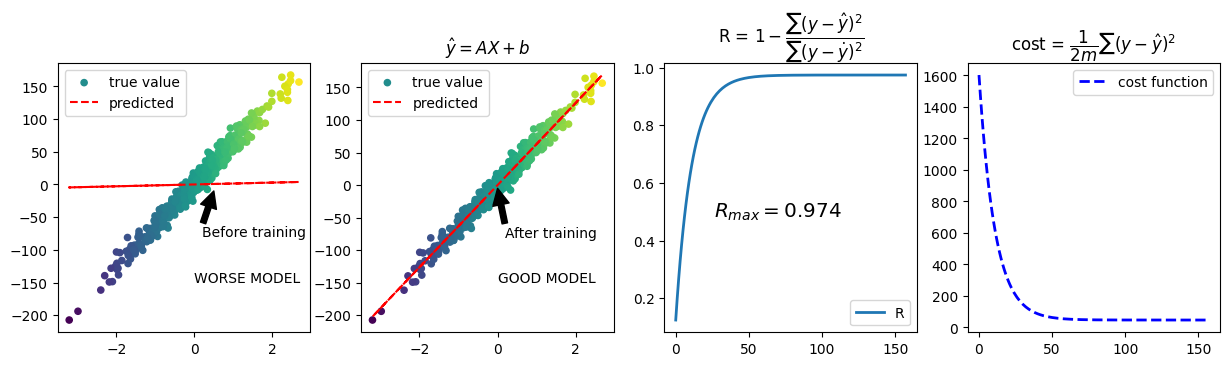

In [176]:
#plotting curves 

fig, axes = plt.subplots(1,4, figsize=(15,3.5))
ax0, ax1, ax2, ax3 = axes.ravel()

ax0.scatter(X[0], y.reshape((-1,)), marker='o', c=yhat, s=20, label = "true value")
ax0.plot(X[0], yhat_, ls='--', color='r', label='predicted')

ax1.scatter(X[0], y.reshape((-1,)), marker='o', c=yhat, s=20, label = "true value")
ax1.plot(X[0], yhat, ls='--', color='r', label='predicted')
ax2.plot(eval, lw=2, label='R')
ax3.plot(cost_history, ls="--", lw=2, color='b', label='cost function')
ax2.set_title("R = $1-\dfrac{{\sum (y-\hat{y})^2}}{\sum (y-\dot{y})^2}$")
ax3.set_title("cost = $\dfrac{1}{2m}\sum (y - \hat{y})^2$")
ax1.set_title('$\hat{y} = A X + b$')
ax2.text(70, 0.5, ha='center', va="center", s='$R_{max} = 0.974} $', fontsize='x-large')
ax0.annotate(xy=(0.5,-10.0), text='Before training', xytext=(0.2,-80.0), arrowprops=dict(color="black"))
ax1.annotate(xy=(0.0,-5.0), text='After training', xytext=(0.2,-80.0), arrowprops=dict(color="black"))

ax1.text(0.0, -150.0, s='GOOD MODEL')
ax0.text(0.0, -150.0, s='WORSE MODEL')
ax1.legend()
ax0.legend()
ax2.legend()
ax3.legend()
plt.savefig("out.png")



Now n_features = 2

In [185]:
n_features = 2
# generating samples
X_, y_    = make_regression(n_samples=500, n_features=n_features, bias=-5.2, noise=20)
# reshape dimensions
X_       = X_.reshape((-1, n_features))
y_       = y_.reshape((-1, 1))

# initialization 
params  = Params(n_features)

# prediction before training the model
Yhat_   = Model(X=X_, params=params) 

# training and evaluating  the model
params_ , cost_history_, eval_, iter_= SGD(X=X_, y=y_, params=params, learning_rate=1e-4, print_val=False, epsilon=1e-6)

# metrics compute
cost_history_, eval_ = cost_history.reshape((-1,)), eval.reshape((-1,))

# prediction 

Yhat = Model(X=X_, params=params).reshape((-1, ))


cost function :
[189.35778591]
R :
0.9702557931453645
new params :
{'A': array([[85.2320753 ],
       [63.77002446]]), 'b': array([-6.41899938])}
interation :
38581 


In [187]:
#reshape outputs
Yhat    = Yhat.reshape((-1, 1))
Yhat_   = yhat_.reshape((-1, 1))
y_      = y_.reshape((-1, 1))
X_      = X_.reshape((-1, n_features))

Text(0.5, 0.92, '3D Visualization')

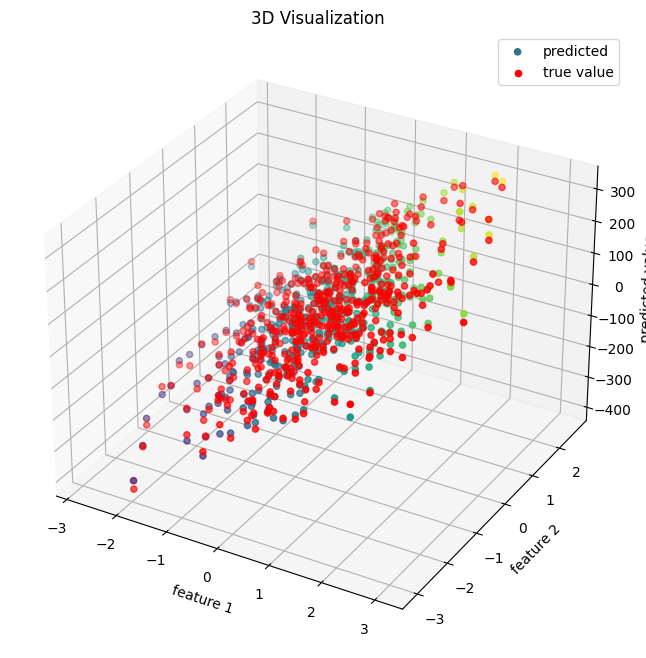

In [188]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
scatter = ax.scatter3D(X_[:, 0], X_[:, 1], Yhat, marker='o', s=20, c=Yhat, label='predicted')
scatter = ax.scatter3D(X_[:, 0], X_[:, 1], y_, marker='o', s=20, color='r', label='true value')
ax.legend(handles=scatter.legend_elements()[0])

ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('predicted value')

ax.legend()
ax.set_title('3D Visualization')

Text(0.5, 0.92, '3D Visualization')

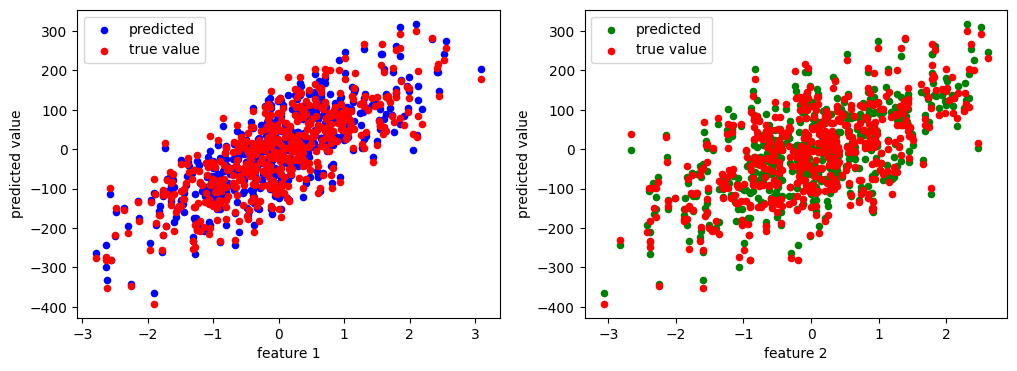

In [189]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
ax1, ax2 = axes.ravel()
ax1.scatter(X_[:, 0], Yhat, marker='o', c='b', s=20, label='predicted')
ax1.scatter(X_[:, 0], y_, marker='o', color='r', s=20,label='true value')
ax2.scatter(X_[:, 1], Yhat, marker='o', color='g', s=20, label='predicted')
ax2.scatter(X_[:, 1], y_, marker='o', c='r', s=20, label = 'true value')
ax2.legend()
ax1.legend()
ax1.set_xlabel('feature 1')
ax2.set_xlabel('feature 2')
ax1.set_ylabel('predicted value')
ax2.set_ylabel('predicted value')

ax.legend()
ax.set_title('3D Visualization')